In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Circle:

    """docstring for Circle"self,radius,origin,num_points """

    def __init__(self, radius, origin, num_points):
        self.radius = radius
        self.origin = origin
        self.num_points = num_points

        self.angles = np.linspace(0, 2*np.pi, num_points+1)
        self.points = self.origin+radius*(np.cos(self.angles) +
                                          1j*np.sin(self.angles))
        self.end = self.points[1:]
        self.start = self.points[:-1]

    def mid_points(self):
        midpoints = 0.5*(self.start+self.end)
        return midpoints

    def draw(self):
        plt.close('all')
        plt.plot(self.points.real, self.points.imag, '--+')
        plt.plot(self.mid_points().real, self.mid_points().imag, '*')
        plt.show()

    def panel_lengths(self):
        plenghts = abs(self.end-self.start)
        return plenghts
    
    def 


C = Circle(1.0, complex(0, 0), 50)

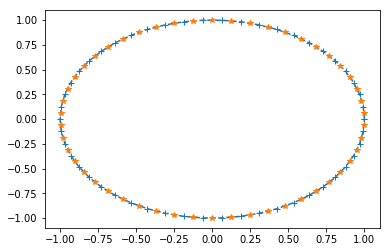

3.1415926535897931j

In [4]:
C.draw()
np.log(np.complex(-1,0))

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class Panel:

    """docstring for Circle"self,radius,origin,num_points """

    def __init__(self, start, end, strength):
        self.start=start
        self.end=end
        self.length=abs(self.end-self.start)
        self.midpoint=0.5*(self.start+self.end)
        self.strength=strength
        self.gamma=1j*self.strength/(2*np.pi)*np.log((self.midpoint-self.length)/self.midpoint)
        
    def vel(self,field):
        complex_phi = 1j*self.phi/(2*np.pi)*np.log((z-location)/location)
        return (-1j*self.gamma/(2*np.pi*(z - self.start))).conjugate()
        
        

        
%matplotlib inline

plt.close('all')

def freestream_phi(V,z):
    complex_phi = V*z
    return complex_phi

def source_phi(strength,location,z):
    complex_phi = (strength/np.pi)*np.log(z - location)
    return complex_phi

def vortex_phi(strength,location,z):
    complex_phi = 1j*strength/(2*np.pi)*np.log((z-location)/location)
    return complex_phi

def create_mesh(x_low = -2, x_up = 2,n_x = 100,y_low = -2, y_up = 2,n_y = 100 ):
    "create_mesh(x_low, x_up, n_x, y_low, y_up, n_y) \
    Leave empty to use the default values"
    x = np.linspace(x_low,x_up,n_x)
    y = np.linspace(y_low,y_up,n_y)
    X,Y = np.meshgrid(x,y)
    z = X+1j*Y
    return z

def source_velocity(z, z_src, strength):
    vel = strength/(2*np.pi*(z - z_src))
    return vel.conjugate()

def vortex_velocity(z, z_vor, gamma):
    return (-1j*gamma/(2*np.pi*(z - z_vor))).conjugate()


def euler_integrate(z,z_src,strength,V, dt ,tf,sv_flag=1):
    result = [z]
    t=0.0
    while t<tf:
        vel = get_velocity(z,z_src,strength,V,sv_flag) 
        z += vel*dt
        result.append(z.copy())
        t += dt
    return np.asarray(result)

def rk2_integrate(z,z_src,strength,V, dt ,tf,sv_flag=1):
    result = [z]
    t = 0.0
    while t < tf:
        vel = get_velocity(z, z_src, strength, V,sv_flag)
        k1 = vel*dt
        z += k1
        vel = get_velocity(z, z_src, strength, V,sv_flag)
        k2 = vel*dt
        z += 0.5*(-k1 + k2) 
        result.append(z.copy()) 
        t += dt
    return np.asarray(result)

def get_velocity(z,z_src,strength,V,sv_flag):
    vel = np.zeros_like(z)
    if sv_flag:
        get_vel=source_velocity
    else:
        get_vel=vortex_velocity
    
    for i,z_i in enumerate(z):
        for j,z_j in enumerate(z_src):
            if z_i != z_j:
                vel[i] += get_vel(z_i,z_j,strength[j])              
    vel += V    
    return vel


def create_tracers(x_low = -2,x_up = -2.0, y_low = -2,y_up = 2,n = 10):
    if x_low == x_up:
        x = x_low*np.ones(n)
    else:
        x =np.linspace(x_low,x_up,n)
    y = np.linspace(y_low,y_up,n) 
    z = x +1j*y
    return z


def vel_constant_strength(z,l):
    vel_z_prime = (1j/(2*np.pi))*np.log((z - l)/z)
    return vel_z_prime
    
def get_vel(z,z_0,l,rot_angle):
    z_prime = (z - z_0)*np.exp(-1j*rot_angle)
    v_z_prime = vel_constant_strength(z_prime,l).conjugate()
    v = (v_z_prime*np.exp(1j*rot_angle))
    return v

P=Panel(complex(0,0),complex(1,0),1.0)
P.phi
V = complex(1,0)
location1 = complex(-0.5,0)
strength1 = 1
location2 = complex(0.5,0)
strength2 = -1

z = create_mesh()

complex_phi = freestream_phi(V,z) + source_phi(strength1,location1,z)\
+ source_phi(strength2,location2,z)

complex_phi

In [7]:
P.strength

1.0

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 16 23:19:51 2016

@author: ajay
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Sep 16 03:02:33 2016

@author: ajay
"""

import numpy as np
import matplotlib.pyplot as plt

#Get end-points,midpoints,unit_normals on panels on a circle
class circle:
    def __init__(self,radius,centre,N):
        self.r = radius
        self.centre = centre 
        self.N = N
        
        self.radians = np.linspace(0,2*np.pi,self.N+1) 
        self.points = self.centre + radius*(np.cos(self.radians) +\
        1j*np.sin(self.radians))
        self.b = self.points[1:]
        self.a = self.points[:-1]
    
    def control_points(self):
        midpoints = 0.5*(self.b + self.a)
        return midpoints
        
    def unit_normals(self):
        c = self.b - self.a
        d = c.imag - 1j*c.real
        e = c.conjugate()/np.absolute(c.conjugate())
#         normals = d/abs(d)
        normals=e
        
        return normals
    
    def lengths(self):
        return abs(self.b - self.a)
        
    def rotation_angle(self):                
        theta = (np.log(self.b - self.a)).imag
        return theta  
        
    def draw(self):
        plt.figure()
        plt.plot(self.points.real,self.points.imag,".")
        plt.show()    
    
def vel_constant_strength(z,l):
    vel_z_prime = (1j/(2*np.pi))*np.log((z - l)/z)
    return vel_z_prime
    
def get_vel(z,z_0,l,rot_angle):
    z_prime = (z - z_0)*np.exp(-1j*rot_angle)
    v_z_prime = vel_constant_strength(z_prime,l).conjugate()
    v = (v_z_prime*np.exp(1j*rot_angle))
    return v


#assembling the "b" matrix
def assemble_b(circ,v_inf):
    b = np.zeros(circ.N+1)
    b[:circ.N] = v_inf.real*(circ.unit_normals()).real + \
    v_inf.imag*(circ.unit_normals()).imag
    return b
#To consider a moving body replace "v_inf" by "vinf + v_body"
  
#Assembling the "A" matrix
def assemble_A(circ):
    A = np.empty((circ.N+1,circ.N))
    
    for i in range(circ.N):
        v = get_vel(circ.control_points()[i],circ.a,circ.lengths(),\
        circ.rotation_angle())
        A[i] = -(v.real*circ.unit_normals()[i].real + \
        v.imag*circ.unit_normals()[i].imag)
        
    A[circ.N] = np.ones(circ.N)
    return A
    
#Solving for gamma
#gamma = np.linalg.lstsq(A,b)
def vel_at_r(r,gamma,circ1,circ2,theta,v_inf):
    
    B = np.empty((circ2.N,circ1.N)) + 1j*np.empty((circ2.N,circ1.N))
    
    for i in range(circ2.N):
        B[i] = get_vel(circ2.b[i],circ1.a,circ1.lengths(),\
        circ1.rotation_angle())
        
    vel = np.dot(B,gamma[0])
    tot_vel = vel + v_inf
    vel_mag = np.abs(tot_vel)
    
    vel_r_exact = (1.0 - (circ1.r/circ2.r)**2)*(abs(v_inf)*np.cos(theta))
    vel_theta_exact = -(1.0 + (circ1.r/circ2.r)**2)*(abs(v_inf)*np.sin(theta))
    vel_exact = np.sqrt(vel_r_exact**2 + vel_theta_exact**2)
    return vel_mag,vel_exact
    
def question():
    no_of_panels = [20,40,60,80,100]
    v_inf = complex(1.0,0.0)
    
    N1 = 200 #no of points on outer circle at which vel is to be calculted.
    
    error = []
    for k in range(len(no_of_panels)):
        error.append([])
    
    for p,N in enumerate(no_of_panels):
        c1 = circle(1.0,complex(0,0),N)
        b = assemble_b(c1,v_inf)
        A = assemble_A(c1)
        gamma = [np.linalg.lstsq(A,b)][0]
        
        radius = [1.4,1.6,1.8,2.0]
                
        for r in radius:
            
            c2 = circle(r,complex(0,0),N1)
            theta1 = (np.log(v_inf)).imag
            theta = c2.radians[1:] + theta1
            
            vel_mag,vel_exact = vel_at_r(r,gamma,c1,c2,theta,v_inf)
            err = vel_exact - vel_mag
            rms_error = np.sqrt(sum(err**2)/N1)
            error[p].append(rms_error.copy())
            
    return error,no_of_panels,radius
    
def plot_it():
    error,no_of_panels,radius = question()
    
    for i,N in enumerate(no_of_panels):
        plt.figure()
        plt.plot(radius,error[i])
        plt.title('No of panels=%s'%N)
        plt.xlabel('radius')
        plt.ylabel('rms_error')
        plt.savefig('No_of_panels=%s.jpg'%N)

# plot_it()

def t0_test(N,r,N1):
    no_of_panels = N
    v_inf = complex(1.0,0.0)
    
    c1 = circle(1.0,complex(0,0),no_of_panels)
    b = assemble_b(c1,v_inf)
    A = assemble_A(c1)
    gamma = [np.linalg.lstsq(A,b)][0]
#     gamma = np.dot(b,np.linalg.inv(A))
    
    no_of_points = N1 #no of points on outer circle at which vel is\
                      #to be calculted.
    c2 = circle(r,complex(0,0),no_of_points)
    theta1 = (np.log(v_inf)).imag
    theta = c2.radians[1:] + theta1
            
    vel_mag,vel_exact = vel_at_r(2,gamma,c1,c2,theta,v_inf)
    
    print (vel_mag)
    print (vel_exact)
# See and compare the velocity values.
    plt.plot(vel_mag,vel_exact)